In [1]:
import torch
import matplotlib.pyplot as plt
import random
import os
import numpy as np


import sys
from pathlib import Path

# Add parent directory to the Python path
sys.path.append(str(Path().resolve().parent))

from Simulate import simulate_parallel, simulate_reference

In [2]:
c = 299792458   


def downsample_tensor(tensor, factor):
    """
    Downsamples a 1D tensor by the given factor by taking every nth sample.
    
    Args:
        tensor (torch.Tensor): The input 1D tensor.
        factor (int): The downsampling factor.
        
    Returns:
        torch.Tensor: The downsampled tensor.
    """
    if len(tensor.shape) != 1:
        raise ValueError("Input tensor must be 1D")
    return tensor[::factor]

# Define Example parameters
deltat = 0.0194e-12  # Time step
L = 2**12  # Number of time points

# Generate reference pulse
reference_pulse = simulate_reference(L, deltat)

In [3]:
# Load the dataset with weights_only=False
file_path = "train_3_layer_nonoise_n1to8.pt"

data = torch.load(f'{file_path}', weights_only=False)

# Extract components
synthetic_data = data["synthetic_data"]
material_params = data["material_params"]
num_layers = data["num_layers"]

print("Dataset loaded successfully!")
print(f"Number of samples: {len(synthetic_data)}")
print(f"Shape of synthetic_data: {synthetic_data.shape}")
print(f"Shape of num_layers: {num_layers.shape}")
print(f"Example number of layers: {num_layers[:10]}")
print()
print(f'Example set of material params')
print(material_params[random.randint(0, len(synthetic_data))])

Dataset loaded successfully!
Number of samples: 30000
Shape of synthetic_data: torch.Size([30000, 1024])
Shape of num_layers: torch.Size([30000])
Example number of layers: tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Example set of material params
[((4.050888224855461-0.096799258550985j), 0.00013884679069499074), ((6.338722624480816-0.03304645046319954j), 0.0003181152962047088), ((1.2565339558759827-0.03591072641136102j), 0.00020464379927777817)]


In [4]:
file_size = os.path.getsize(f'{file_path}')

file_size_MB = file_size / (1024*1024)

print(f'File size: {file_size_MB:.2f} MB')

File size: 128.38 MB


Num layers: 3
Material parameters: [((1.8015091215119021-0.09921331790123723j), 0.00044306128396406994), ((2.526185155146335-0.09893136140040122j), 0.0004760570060185526), ((6.645147921124547-0.03736178348941327j), 0.00035179621741538624)]


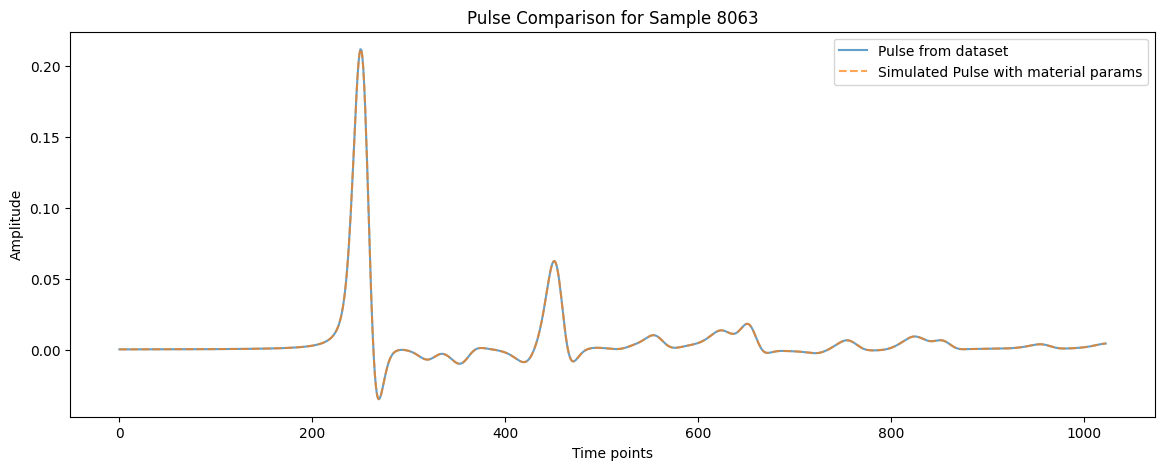

Sample 8063 comparison complete.
Num layers: 3
Material parameters: [((2.259607074466029-0.029825308388046506j), 0.0001426559148444169), ((7.667673086274361-0.09079880219902292j), 0.00014253206443063851), ((4.4847986982140124-0.009238225729596983j), 0.0001465363378668757)]


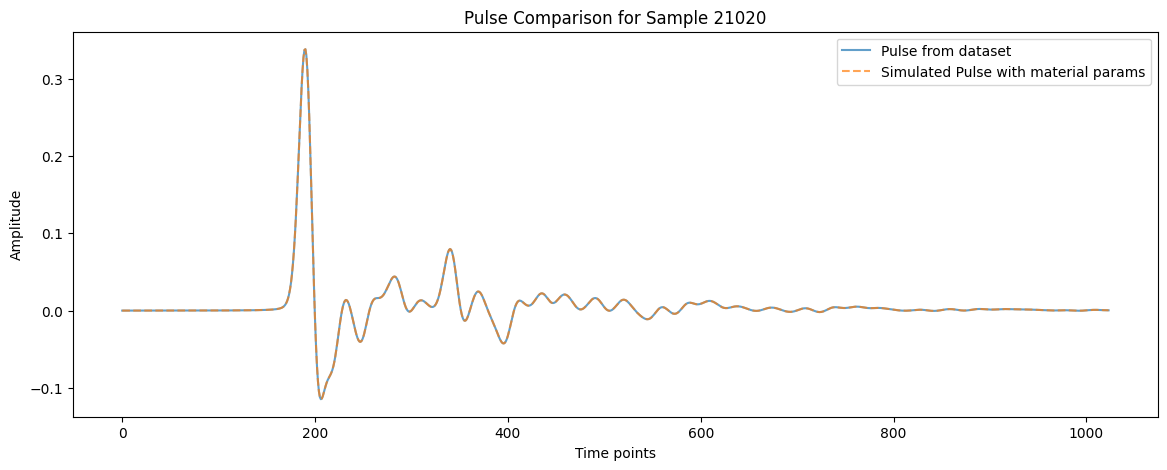

Sample 21020 comparison complete.
Num layers: 3
Material parameters: [((5.832210888536242-0.029598792341012287j), 0.00040062634264483884), ((4.478125898104768-0.020330928359849718j), 0.00011149111245990117), ((7.898649097789818-0.06998969166337157j), 0.00018890320537499352)]


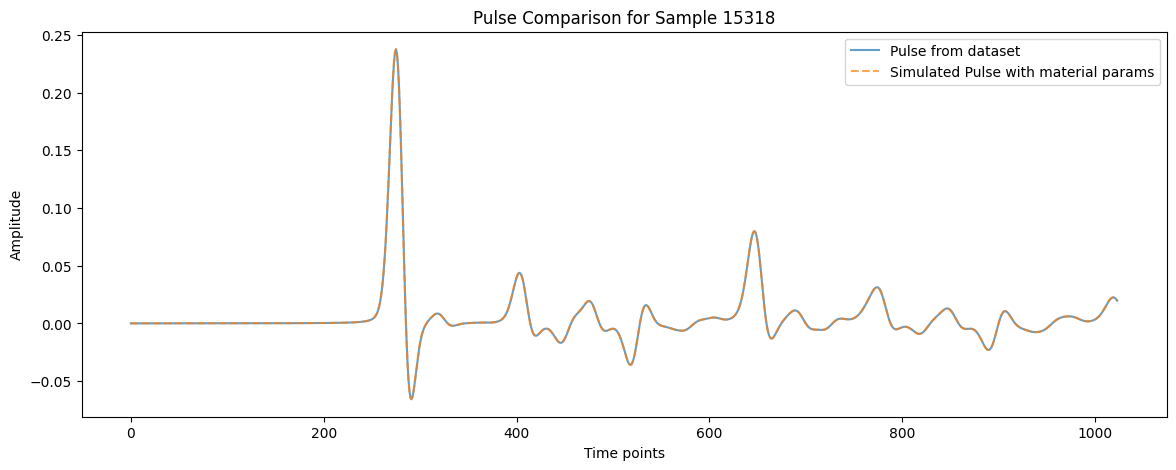

Sample 15318 comparison complete.
Num layers: 3
Material parameters: [((5.736913254465856-0.06195790250949927j), 0.00012112050366847412), ((3.2744522014751216-0.08572418211983722j), 0.00018655879071942545), ((7.095852177945726-0.02530525393302864j), 0.0003218753590459355)]


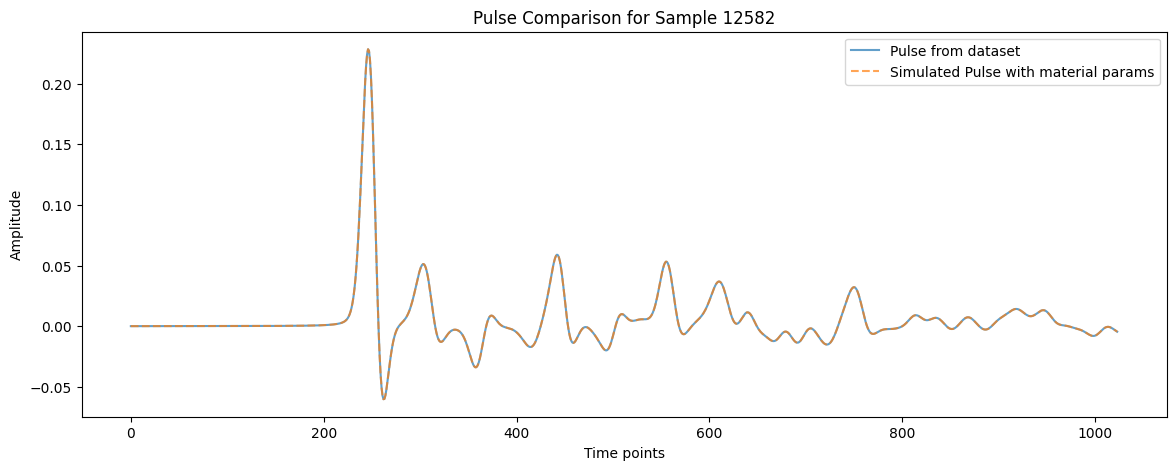

Sample 12582 comparison complete.
Num layers: 3
Material parameters: [((2.256395680322303-0.07529295915149276j), 0.0004027823639591119), ((3.315895865015389-0.007621321302284698j), 0.0004363541420181355), ((2.0017094298636-0.04728353669387914j), 0.0002853973631687239)]


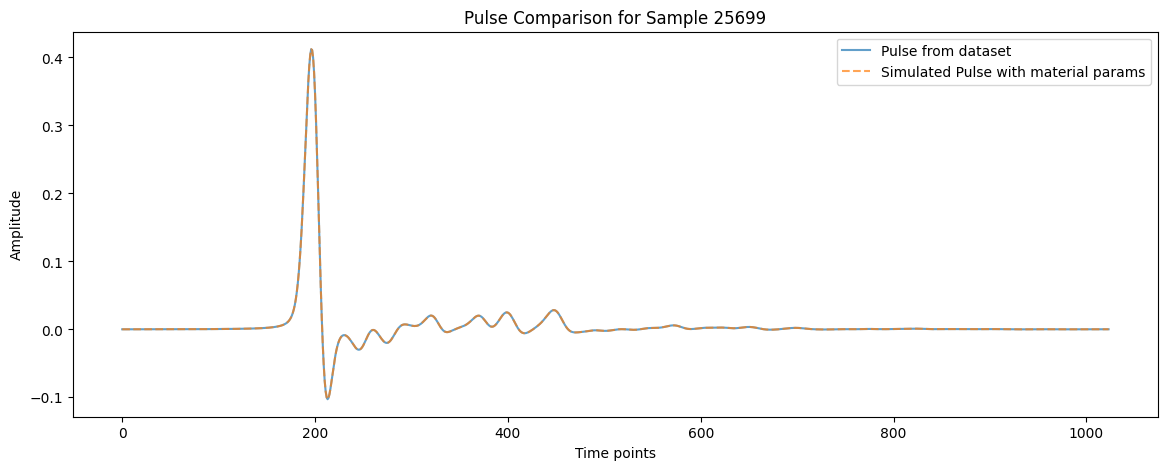

Sample 25699 comparison complete.


In [5]:
# Sample 5 random datapoints
num_samples = len(synthetic_data)
random_indices = np.random.choice(num_samples, 5, replace=False)

# Plot the pulses and compare them
for idx in random_indices:
    # Get the material parameters and the reference pulse for this sample
    material_sample = material_params[idx]
    print(f'Num layers: {len(material_sample)}')
    print(f'Material parameters: {material_sample}')
    # Simulate the pulse with the material parameters
    simulated_pulse = simulate_parallel(reference_pulse, material_sample, deltat, 0)[1].detach().cpu()[:L]
    simulated_pulse = downsample_tensor(simulated_pulse, 4)

    # Get the saved pulse from the dataset
    saved_pulse = synthetic_data[idx].cpu()


    # Plot both the simulated pulse and the saved pulse
    plt.figure(figsize=(14, 5))
    plt.plot(saved_pulse, label='Pulse from dataset', alpha=0.7)
    plt.plot(simulated_pulse, label='Simulated Pulse with material params', alpha=0.7, linestyle='--')
    plt.title(f"Pulse Comparison for Sample {idx}")
    plt.xlabel("Time points")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    print(f"Sample {idx} comparison complete.")